In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

The below column reference:

    step: represents a unit of time where 1 step equals 1 hour
    type: type of online transaction
    amount: the amount of the transaction
    nameOrig: customer starting the transaction
    oldbalanceOrg: balance before the transaction
    newbalanceOrig: balance after the transaction
    nameDest: recipient of the transaction
    oldbalanceDest: initial balance of recipient before the transaction
    newbalanceDest: the new balance of recipient after the transaction
    isFraud: fraud transaction


In [2]:
df = pd.read_csv('Transaction_data.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

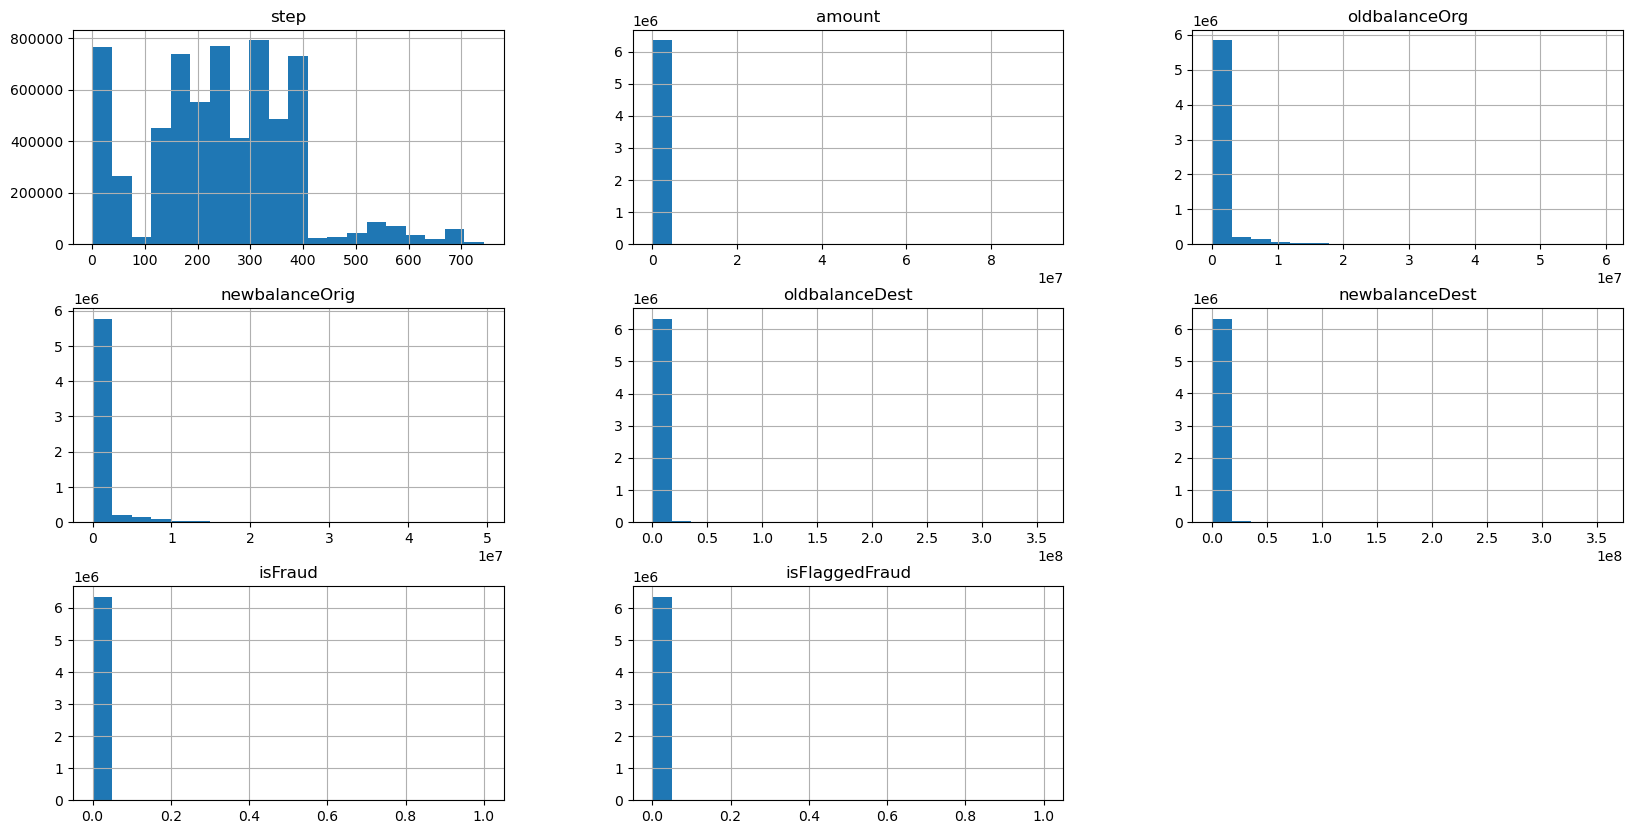

In [6]:
df.hist(bins=20, figsize=(20, 10))
plt.plot

In [7]:
# Look for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Text(0.5, 1.0, 'Number of transactions by type')

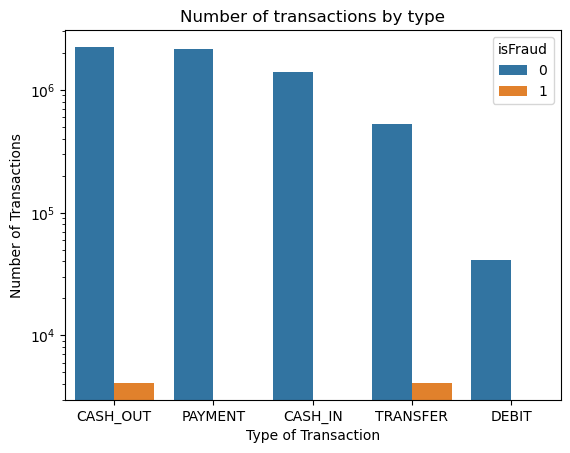

In [11]:
# Looking for what type of transactions are fraudulent
sns.countplot(x=df['type'], hue=df['isFraud'], order=df['type'].value_counts().index)
plt.yscale("log")
plt.ylabel("Number of Transactions")
plt.xlabel("Type of Transaction")
plt.title("Number of transactions by type")

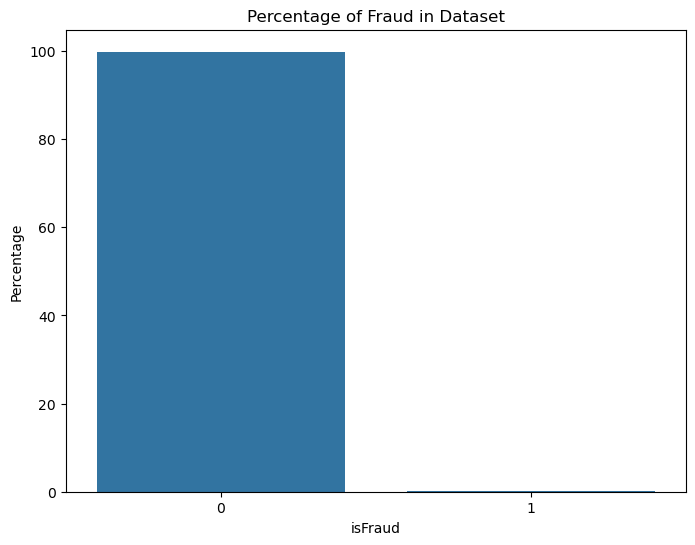

,isFraud,percentage
0,0,99.870918
1,1,0.129082


In [13]:
# Looking for imbalance in the data
df_percentage = (df['isFraud'].value_counts(normalize=True) * 100).reset_index()

df_percentage.columns = ['isFraud', 'percentage']

plt.figure(figsize=(8, 6))
sns.barplot(data=df_percentage, x='isFraud', y='percentage', errorbar=None)
plt.xlabel('isFraud')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud in Dataset')
plt.show()

df_percentage


In [15]:
fraud_by_type = df[df['isFraud'] == 1].groupby("type").size()
fraud_by_type_df = fraud_by_type.reset_index(name='count')
fraud_by_type_df


,type,count
0,CASH_OUT,4116
1,TRANSFER,4097


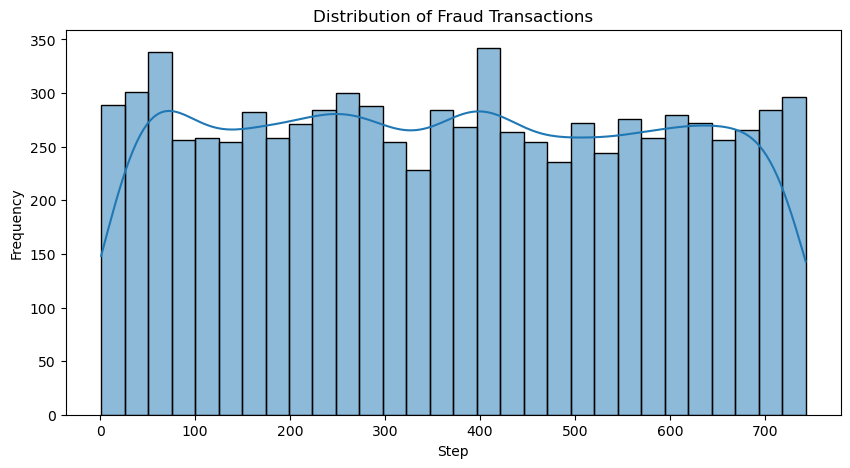

In [16]:
# Plotting fraud over time

plt.figure(figsize=(10, 5))
fraud_transactions = df[df['isFraud'] == 1]
sns.histplot(fraud_transactions["step"], bins=30, kde=True)
plt.title('Distribution of Fraud Transactions')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

In [17]:
df_corr = df.drop(['nameOrig', 'type', 'nameDest'], axis=1)

<Axes: >

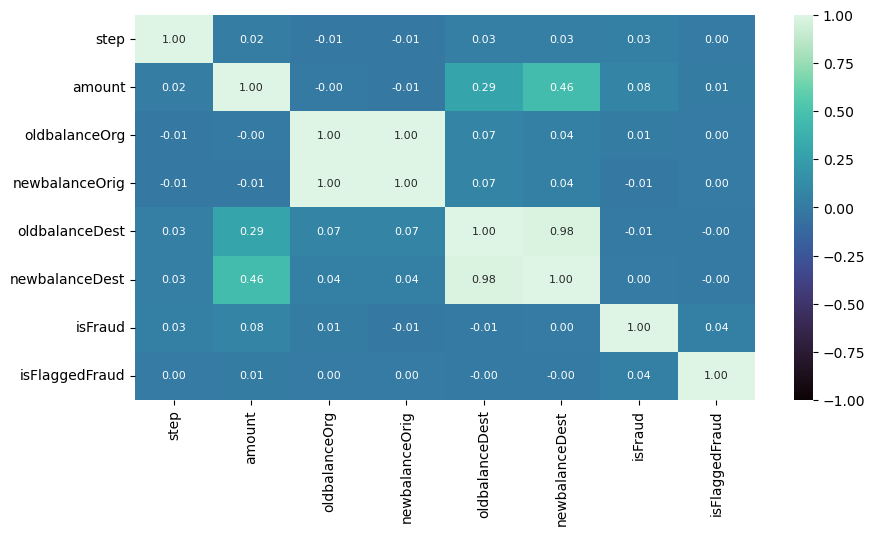

In [18]:
# Check the correlation between features
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, cmap="mako", annot=True, fmt=".2f", annot_kws={'size': 8})

In [20]:
features_cont = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

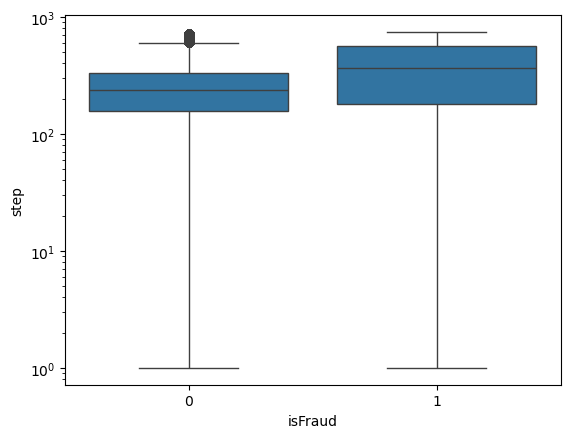

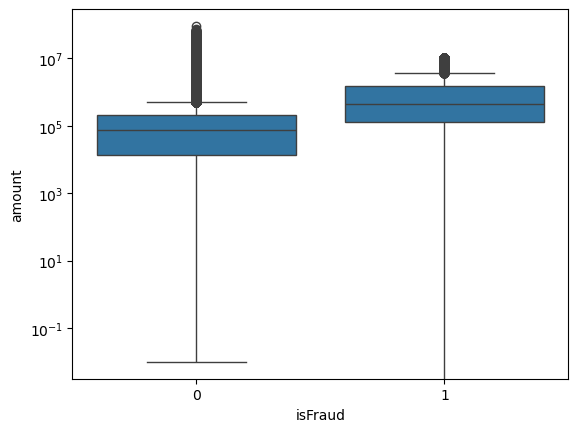

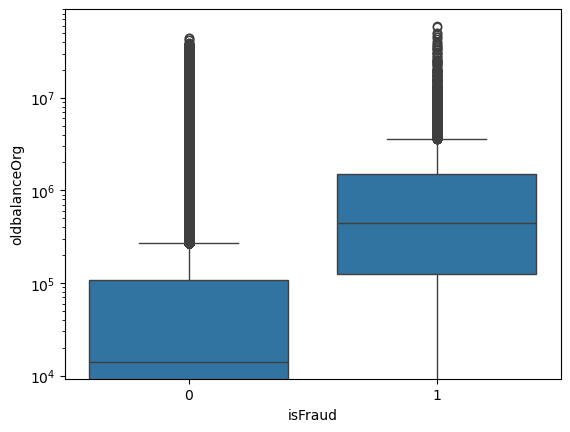

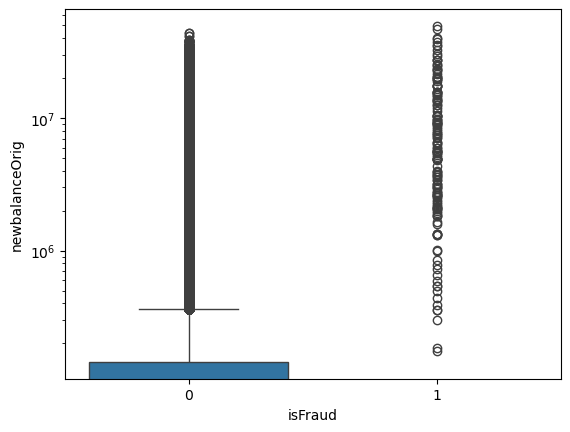

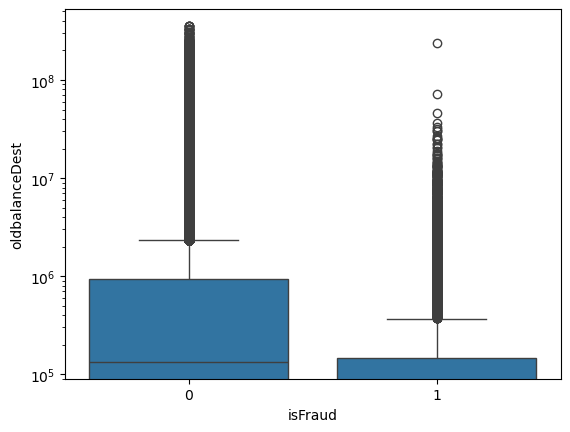

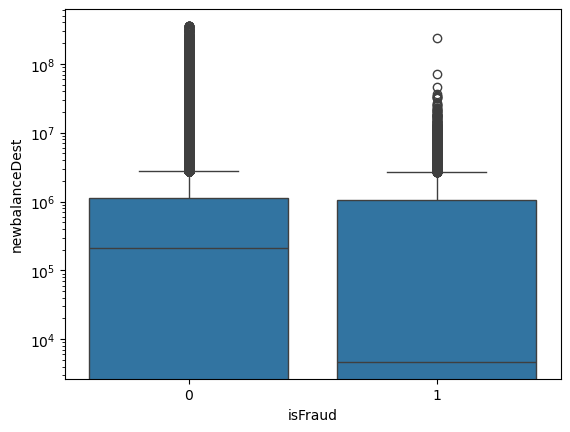

In [21]:
# Boxplot of all numerical features vs isFraud
for i in features_cont:
    plt.figure()
    sns.boxplot(data=df, x=df['isFraud'], y=df[i])
    plt.yscale("log")
    plt.show()
   

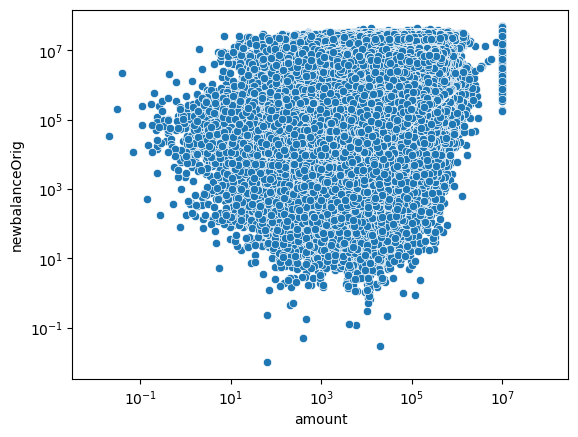

In [22]:
sns.scatterplot(x=df['amount'], y=df['newbalanceOrig'])
plt.yscale("log")
plt.xscale("log")

In [23]:
# One hot encoding type
ohe = OneHotEncoder()
encoded_type = ohe.fit_transform(df['type'].values.reshape(-1, 1))
encoded_df = pd.DataFrame(encoded_type.toarray(), columns=ohe.get_feature_names_out(['type']))
df_encoded = pd.concat([df.drop(columns=['type']), encoded_df], axis=1)

In [25]:
X = df_encoded.drop(['isFlaggedFraud', 'isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df_encoded['isFraud']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:
#  Using robust scaler to deal with outliers
rs = RobustScaler()
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest']
X_train[numeric_columns] = rs.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = rs.transform(X_test[numeric_columns])

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5090096, 11), (1272524, 11), (5090096,), (1272524,))

In [29]:
#  Logistic regression
lg = LogisticRegression(max_iter=1000)
lg.fit(X_test, y_test)

LogisticRegression(max_iter=1000)

In [30]:
print(classification_report(y_test, lg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.89      0.44      0.59      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.72      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524



0.9992102310054664


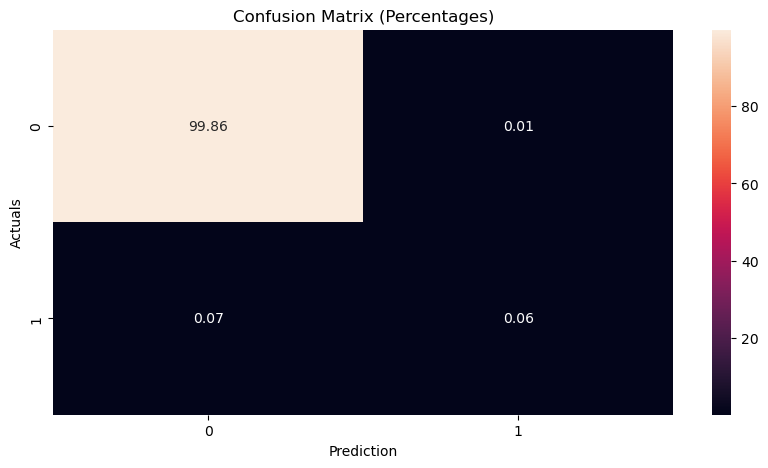

In [31]:
cm = confusion_matrix(y_test, lg.predict(X_test))
plt.figure(figsize=(10, 5))
sns.heatmap(cm/np.sum(cm)*100, annot=True, fmt='.2f')
plt.xlabel("Prediction")
plt.ylabel("Actuals")
plt.title("Confusion Matrix (Percentages)")

acc_score = accuracy_score(y_test, lg.predict(X_test))
print(acc_score)

In [32]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=5, learning_rate=0.1, max_depth=2, random_state=42)
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train)

0.9988446190405839

In [33]:
print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      0.10      0.17      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.55      0.59   1272524
weighted avg       1.00      1.00      1.00   1272524



0.9988306703842128


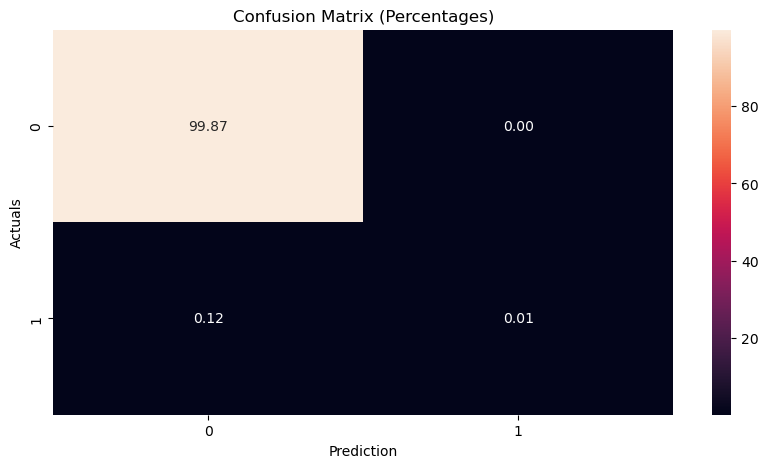

In [34]:
cm = confusion_matrix(y_test, gbc.predict(X_test))
plt.figure(figsize=(10, 5))
sns.heatmap((cm/np.sum(cm))*100, annot=True, fmt='.2f')
plt.xlabel("Prediction")
plt.ylabel("Actuals")
plt.title("Confusion Matrix (Percentages)")

acc_score = accuracy_score(y_test, gbc.predict(X_test))
print(acc_score)

In [37]:
# ANN 
model_ann = Sequential()
#Input Layer
model_ann.add(Dense(units = 10, kernel_initializer='uniform', activation='relu', input_shape=(11,)))
# Hidden layer
model_ann.add(Dense(units = 2, kernel_initializer='uniform', activation='relu'))

model_ann.add(Dense(units = 1, kernel_initializer='uniform', activation='sigmoid'))

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann.fit(X_train, y_train, batch_size =1000, epochs = 5, validation_split=0.20)


Epoch 1/5
4073/4073 [==============================] - 11s 2ms/step - loss: 0.0665 - accuracy: 0.9987 - val_loss: 0.0251 - val_accuracy: 0.9987
Epoch 2/5
4073/4073 [==============================] - 10s 2ms/step - loss: 0.0251 - accuracy: 0.9987 - val_loss: 0.0161 - val_accuracy: 0.9987
Epoch 3/5
4073/4073 [==============================] - 10s 2ms/step - loss: 0.0110 - accuracy: 0.9987 - val_loss: 0.0092 - val_accuracy: 0.9987
Epoch 4/5
4073/4073 [==============================] - 10s 2ms/step - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.0079 - val_accuracy: 0.9987
Epoch 5/5
4073/4073 [==============================] - 10s 2ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.0050 - val_accuracy: 0.9992


In [38]:
model_ann.save("model_financial.keras")

In [39]:
finance_model = tf.keras.models.load_model('model_financial.keras')

In [40]:
y_pred_ann = finance_model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

39767/39767 [==============================] - 56s 1ms/step


In [41]:
y_pred_ann = y_pred_ann.flatten()
y_pred_ann

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.92      0.36      0.51      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.68      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524



0.9991277178269329


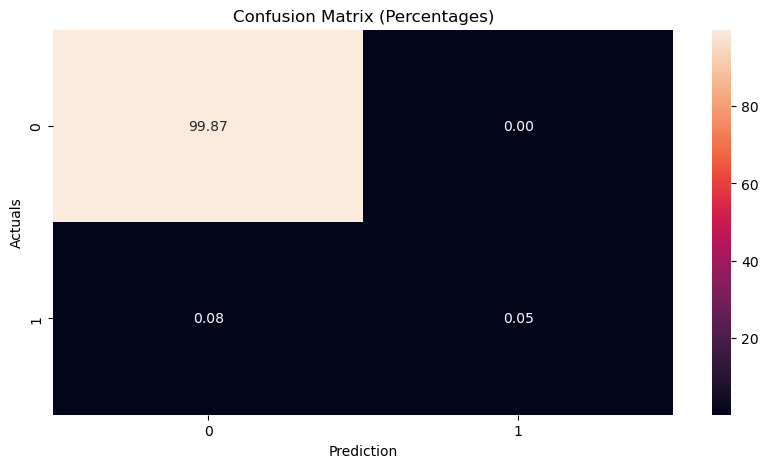

In [43]:
cm = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(10, 5))
sns.heatmap((cm/np.sum(cm))*100, annot=True, fmt='.2f')
plt.xlabel("Prediction")
plt.ylabel("Actuals")
plt.title("Confusion Matrix (Percentages)")

acc_score = accuracy_score(y_test, y_pred_ann)
print(acc_score)

AUC: 0.678311


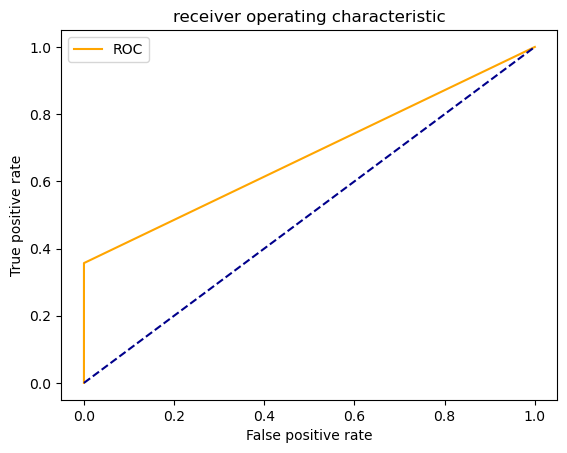

In [44]:
# ROC curve of ANN
auc_mod = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc_mod)

frp, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(frp, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('receiver operating characteristic')
plt.legend()
plt.show()

In [45]:
# Splitting data into fraud and not fraud transactions
not_frauds = df_encoded.query('isFraud == 0')
frauds = df_encoded.query('isFraud == 1')

In [46]:
# Making a dataframe with the same number of fraudulent and non fraudulent transactions
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=42)])
balanced_df['isFraud'].value_counts()

isFraud
1    8213
0    8213
Name: count, dtype: int64

In [47]:
balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
5682294,397,76550.74,C658247527,1096252.93,1172803.66,C492670573,2208784.02,2132233.28,0,0,1.0,0.0,0.0,0.0,0.0
3256548,251,12617.11,C1812418129,339181.87,326564.76,M1924423059,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
1059489,98,8055.06,C1544350298,8055.06,0.00,C912405348,0.00,8055.06,1,0,0.0,1.0,0.0,0.0,0.0
6161404,550,342309.91,C662184778,342309.91,0.00,C1740503020,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
6206417,586,2581549.92,C648614053,2581549.92,0.00,C213455810,0.00,2581549.92,1,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546533,382,542461.74,C664480557,0.00,0.00,C1725191429,1757516.20,2299977.94,0,0,0.0,1.0,0.0,0.0,0.0
796333,40,2032.93,C1544432489,7625673.00,7627705.93,C1918821785,323961.50,321928.56,0,0,1.0,0.0,0.0,0.0,0.0
6039793,484,156220.74,C389614238,156220.74,0.00,C643171110,0.00,156220.74,1,0,0.0,1.0,0.0,0.0,0.0
1030533,71,1871553.73,C677678546,1871553.73,0.00,C646623849,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0


In [48]:
X_balanced = balanced_df.drop(['isFlaggedFraud', 'isFraud', 'nameOrig', 'nameDest'], axis=1)
y_balanced = balanced_df['isFraud']

In [50]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

In [51]:
# Applying robust scaler on this dataframe
X_train_b[numeric_columns] = rs.fit_transform(X_train_b[numeric_columns])
X_test_b[numeric_columns] = rs.transform(X_test_b[numeric_columns])

In [53]:
X_train_b.shape, y_train_b.shape, X_test_b.shape, y_test_b.shape

((13140, 11), (13140,), (3286, 11), (3286,))

In [54]:
# Log regression with balanced data
log_reg_b = LogisticRegression()
log_reg_b.fit(X_train_b, y_train_b)
log_reg_b.score(X_train_b, y_train_b)

c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.839041095890411

In [55]:
print(classification_report(y_test_b, log_reg_b.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1643
           1       0.94      0.74      0.83      1643

    accuracy                           0.85      3286
   macro avg       0.87      0.85      0.85      3286
weighted avg       0.87      0.85      0.85      3286



0.8493609251369446


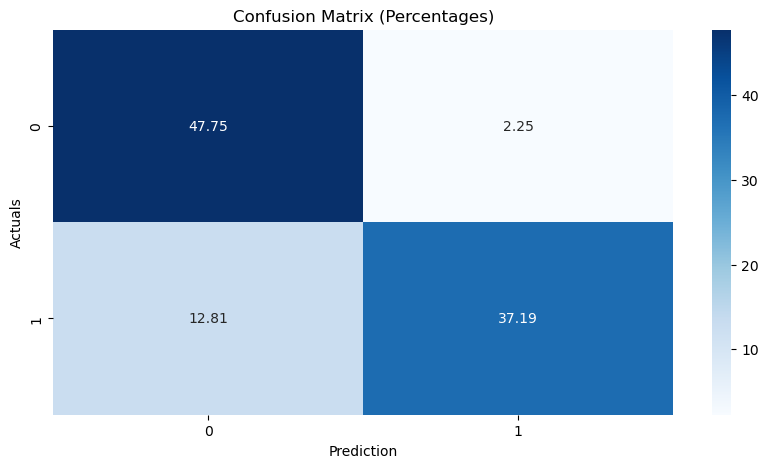

In [56]:
cm = confusion_matrix(y_test_b, log_reg_b.predict(X_test_b))
plt.figure(figsize=(10, 5))
sns.heatmap((cm/np.sum(cm))*100, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("Actuals")
plt.title("Confusion Matrix (Percentages)")

acc_score = accuracy_score(y_test_b, log_reg_b.predict(X_test_b))
print(acc_score)

In [57]:
# Random Forest with balanced data
randomforest_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
randomforest_b.fit(X_train_b, y_train_b)
randomforest_b.score(X_train_b, y_train_b)

0.9426940639269407

In [58]:
print(classification_report(y_test_b, randomforest_b.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1643
           1       0.95      0.95      0.95      1643

    accuracy                           0.95      3286
   macro avg       0.95      0.95      0.95      3286
weighted avg       0.95      0.95      0.95      3286



0.9494826536822885


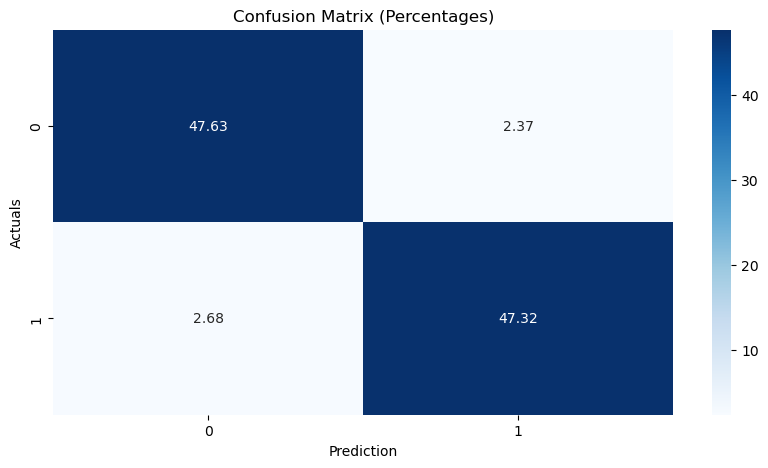

In [59]:
cm = confusion_matrix(y_test_b, randomforest_b.predict(X_test_b))
plt.figure(figsize=(10, 5))
sns.heatmap((cm/np.sum(cm))*100, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("Actuals")
plt.title("Confusion Matrix (Percentages)")

acc_score = accuracy_score(y_test_b, randomforest_b.predict(X_test_b))
print(acc_score)

In [60]:
# GradientBoostingClassifier with balanced data
gbc_b = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=42)
gbc_b.fit(X_train_b, y_train_b)
gbc_b.score(X_train_b, y_train_b)

0.9961187214611872

In [61]:
print(classification_report(y_test_b, gbc_b.predict(X_test_b)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1643
           1       0.99      1.00      0.99      1643

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



0.9908703590992087


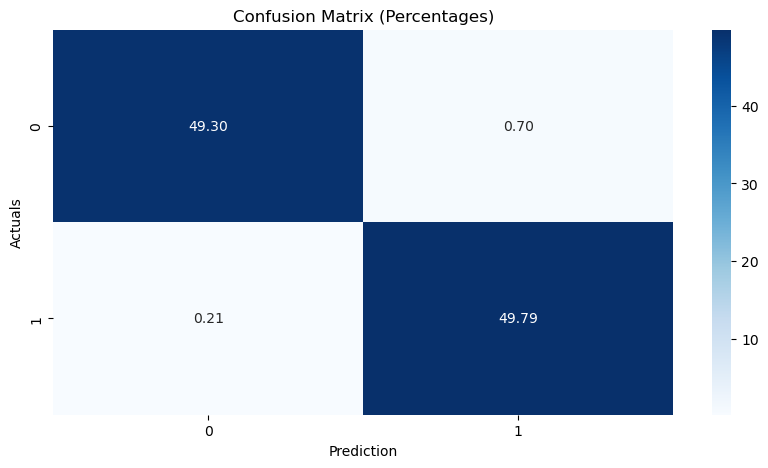

In [62]:
cm = confusion_matrix(y_test_b, gbc_b.predict(X_test_b))
plt.figure(figsize=(10, 5))
sns.heatmap((cm/np.sum(cm))*100, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("Actuals")
plt.title("Confusion Matrix (Percentages)")

acc_score = accuracy_score(y_test_b, gbc_b.predict(X_test_b))
print(acc_score)

In [63]:
# SVC with balanced data
svc_b = SVC(class_weight='balanced')
svc_b.fit(X_train_b, y_train_b)
print(classification_report(y_test_b, svc_b.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.75      0.48      0.59      1643
           1       0.62      0.84      0.71      1643

    accuracy                           0.66      3286
   macro avg       0.68      0.66      0.65      3286
weighted avg       0.68      0.66      0.65      3286



In [155]:
# ANN with balanced data
model_ann_b = Sequential()
#Input Layer
model_ann_b.add(Dense(units = 16, kernel_initializer='uniform', activation='relu', input_shape=(11,)))
# Hidden layer
model_ann_b.add(Dense(units = 8, kernel_initializer='uniform', activation='relu'))

model_ann_b.add(Dense(units = 4, kernel_initializer='uniform', activation='relu'))

model_ann_b.add(Dense(units = 1, kernel_initializer='uniform', activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_ann_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



history_b = model_ann_b.fit(X_train_b, y_train_b, batch_size=64, epochs=20, validation_split=0.20)

Epoch 1/20
165/165 [==============================] - 2s 4ms/step - loss: 0.7463 - accuracy: 0.5673 - val_loss: 0.6912 - val_accuracy: 0.4916
Epoch 2/20
165/165 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5066 - val_loss: 0.6695 - val_accuracy: 0.7066
Epoch 3/20
165/165 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7200 - val_loss: 0.5996 - val_accuracy: 0.8002
Epoch 4/20
165/165 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7876 - val_loss: 0.5230 - val_accuracy: 0.8010
Epoch 5/20
165/165 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7885 - val_loss: 0.4796 - val_accuracy: 0.8010
Epoch 6/20
165/165 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7886 - val_loss: 0.4556 - val_accuracy: 0.7991
Epoch 7/20
165/165 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.7901 - val_loss: 0.4454 - val_accuracy: 0.8078
Epoch 

In [156]:
model_ann_b.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 16)                192       
                                                                 
 dense_45 (Dense)            (None, 8)                 136       
                                                                 
 dense_46 (Dense)            (None, 4)                 36        
                                                                 
 dense_47 (Dense)            (None, 1)                 5         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
model_ann_b.save("model_financial_b.keras")

In [158]:
finance_model_b = tf.keras.models.load_model('model_financial_b.keras')

In [159]:
y_pred_ann_b = finance_model_b.predict(X_test_b)
y_pred_ann_b = np.where(y_pred_ann_b > 0.5, 1, 0)

103/103 [==============================] - 0s 1ms/step


In [160]:
y_pred_ann_b = y_pred_ann_b.flatten()
y_pred_ann_b

array([0, 1, 0, ..., 0, 1, 1])

In [161]:
print(classification_report(y_test_b, y_pred_ann_b))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1643
           1       0.99      0.63      0.77      1643

    accuracy                           0.81      3286
   macro avg       0.86      0.81      0.81      3286
weighted avg       0.86      0.81      0.81      3286



0.8119293974437005


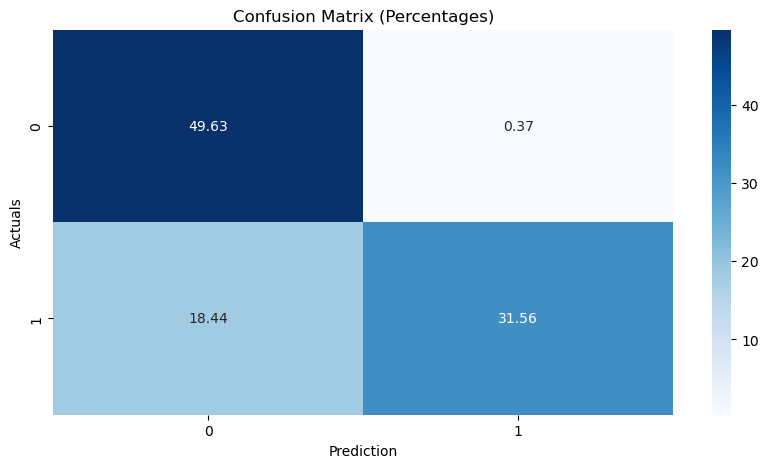

In [162]:
cm = confusion_matrix(y_test_b, y_pred_ann_b)
plt.figure(figsize=(10, 5))
sns.heatmap((cm/np.sum(cm))*100, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("Actuals")
plt.title("Confusion Matrix (Percentages)")

acc_score = accuracy_score(y_test_b, y_pred_ann_b)
print(acc_score)

AUC: 0.811929


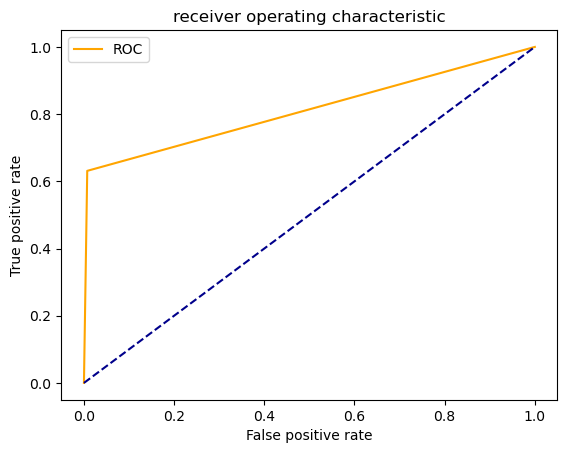

In [163]:
# ROC curve of ANN
auc_mod = roc_auc_score(y_test_b, y_pred_ann_b)
print('AUC: %f' %auc_mod)

frp, tpr, _ = roc_curve(y_test_b, y_pred_ann_b)
plt.plot(frp, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('receiver operating characteristic')
plt.legend()
plt.show()

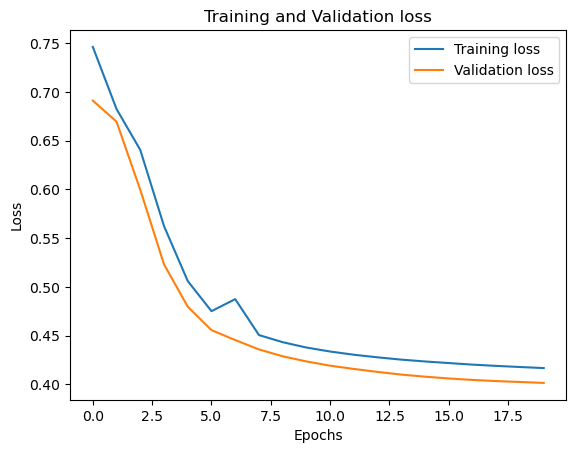

In [164]:
# plotting the training loss and validatin loss
history_df = pd.DataFrame(history_b.history)

plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

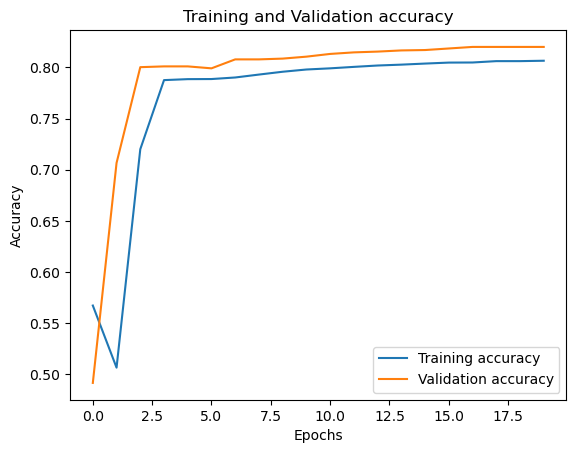

In [165]:
#  Training and validation accuracy
history_df = pd.DataFrame(history_b.history)

plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()